In [2]:
import numpy as np
import pandas as pd
import datetime

In [3]:
df = pd.read_csv('car data.csv')
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
df.shape

(301, 9)

In [5]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [8]:
df1 = df.drop(columns='Car_Name')
df1.shape

(301, 8)

In [9]:
x = datetime.datetime.now()
x.year

2021

In [10]:
df1['No._of_Years'] = x.year - df1.Year
df1.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  No._of_Years  
0       Manual      0             7  
1       Manual      0             8  
2       Manual      0             4  
3       Manual      0            10  
4       Manual      0             7

In [11]:
df1.drop(columns = 'Year' , axis=1 , inplace=True)

In [12]:
df1.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  No._of_Years  
0       Manual      0             7  
1       Manual      0             8  
2       Manual      0             4  
3       Manual      0            10  
4       Manual      0             7

In [13]:
df1 = pd.get_dummies(df1 , drop_first=True)
df1.head()

Selling_Price  Present_Price  Kms_Driven  Owner  No._of_Years  \
0           3.35           5.59       27000      0             7   
1           4.75           9.54       43000      0             8   
2           7.25           9.85        6900      0             4   
3           2.85           4.15        5200      0            10   
4           4.60           6.87       42450      0             7   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

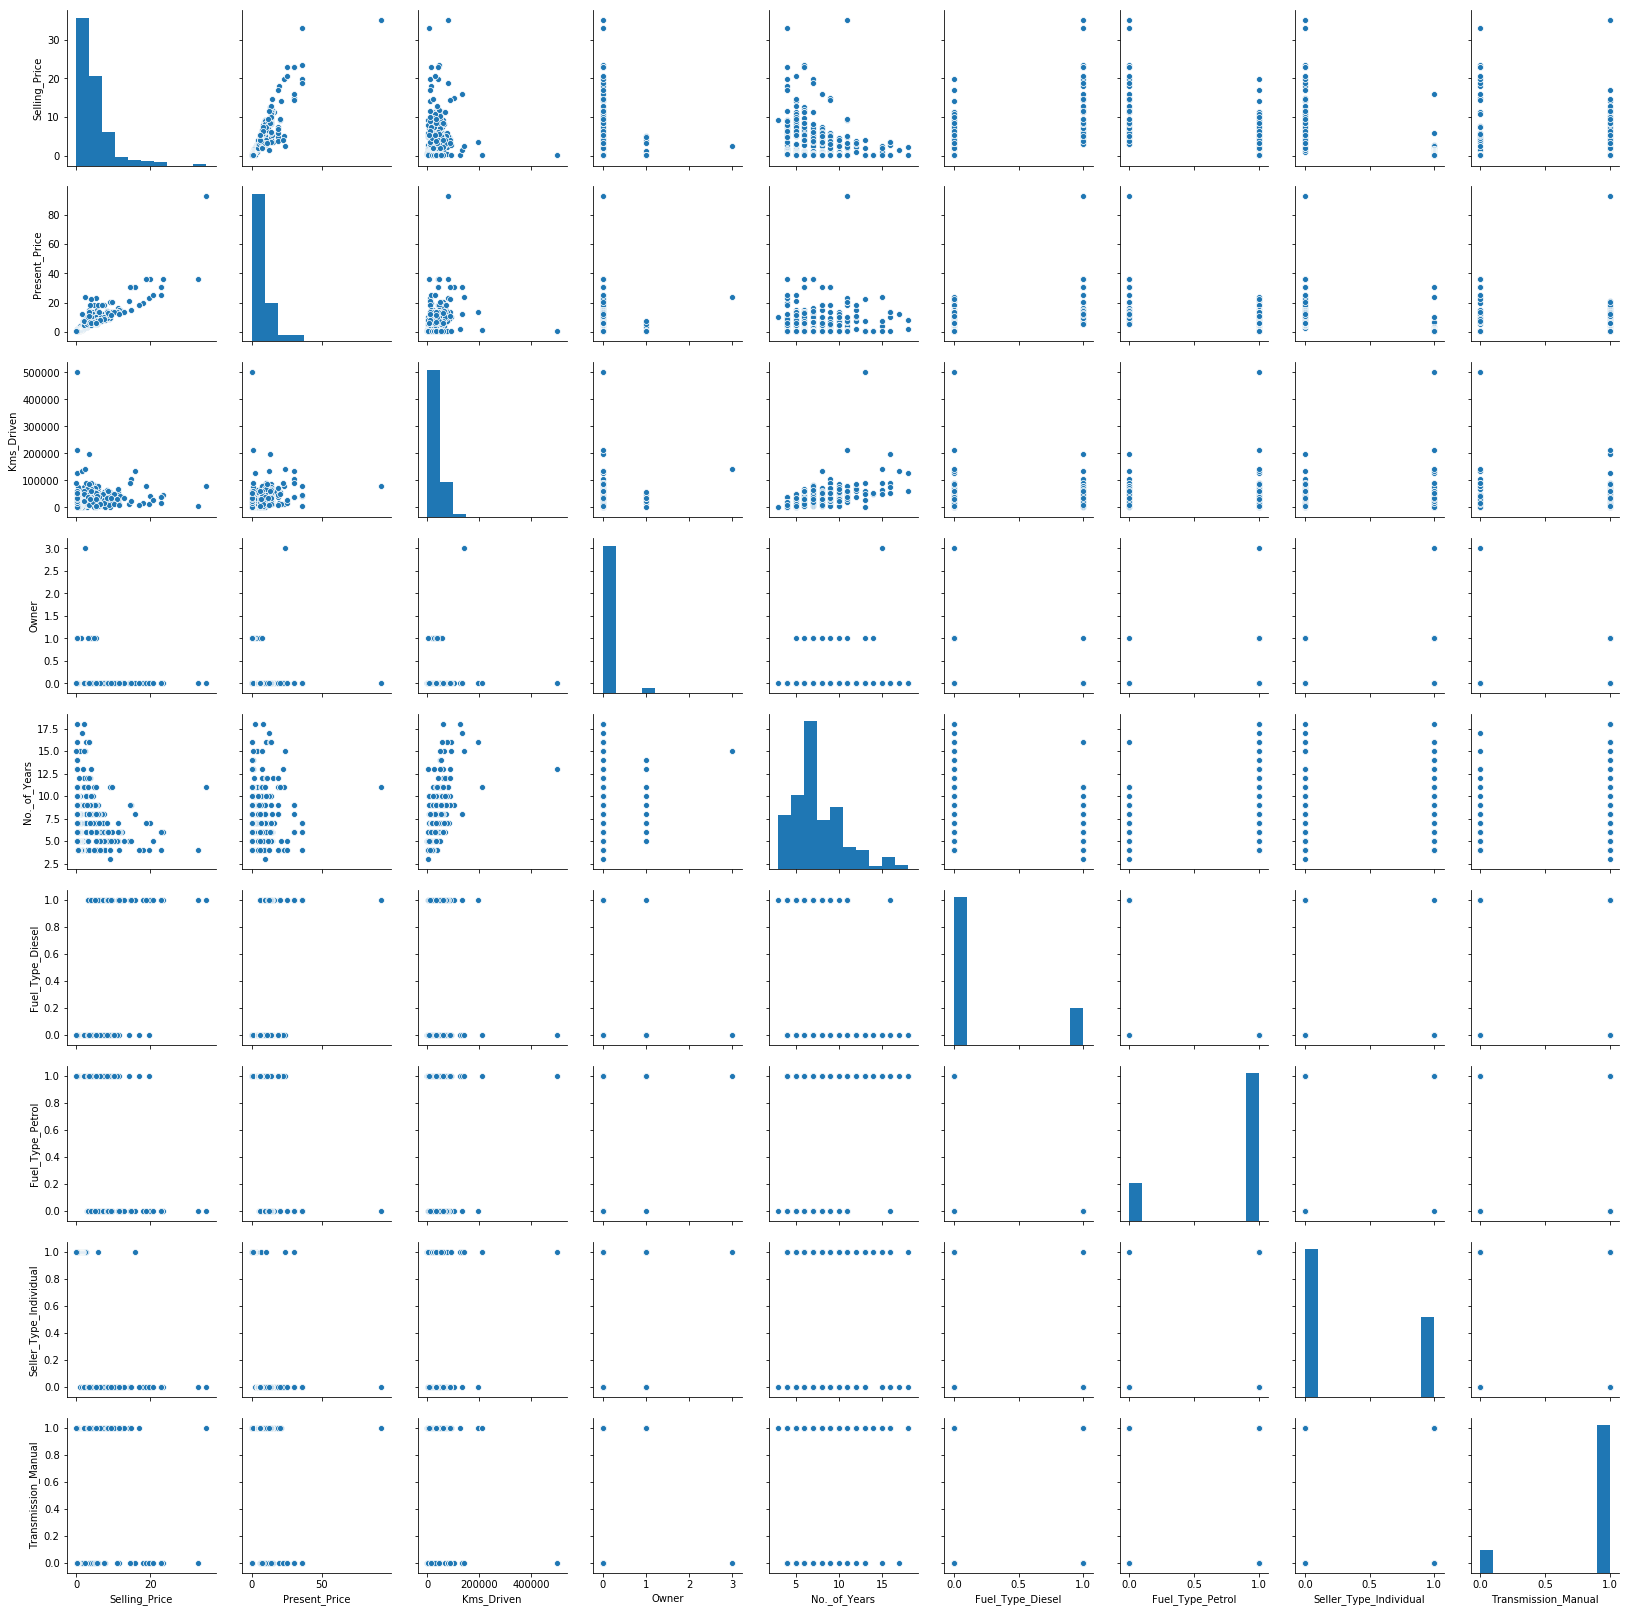

In [15]:
sns.pairplot(df1)

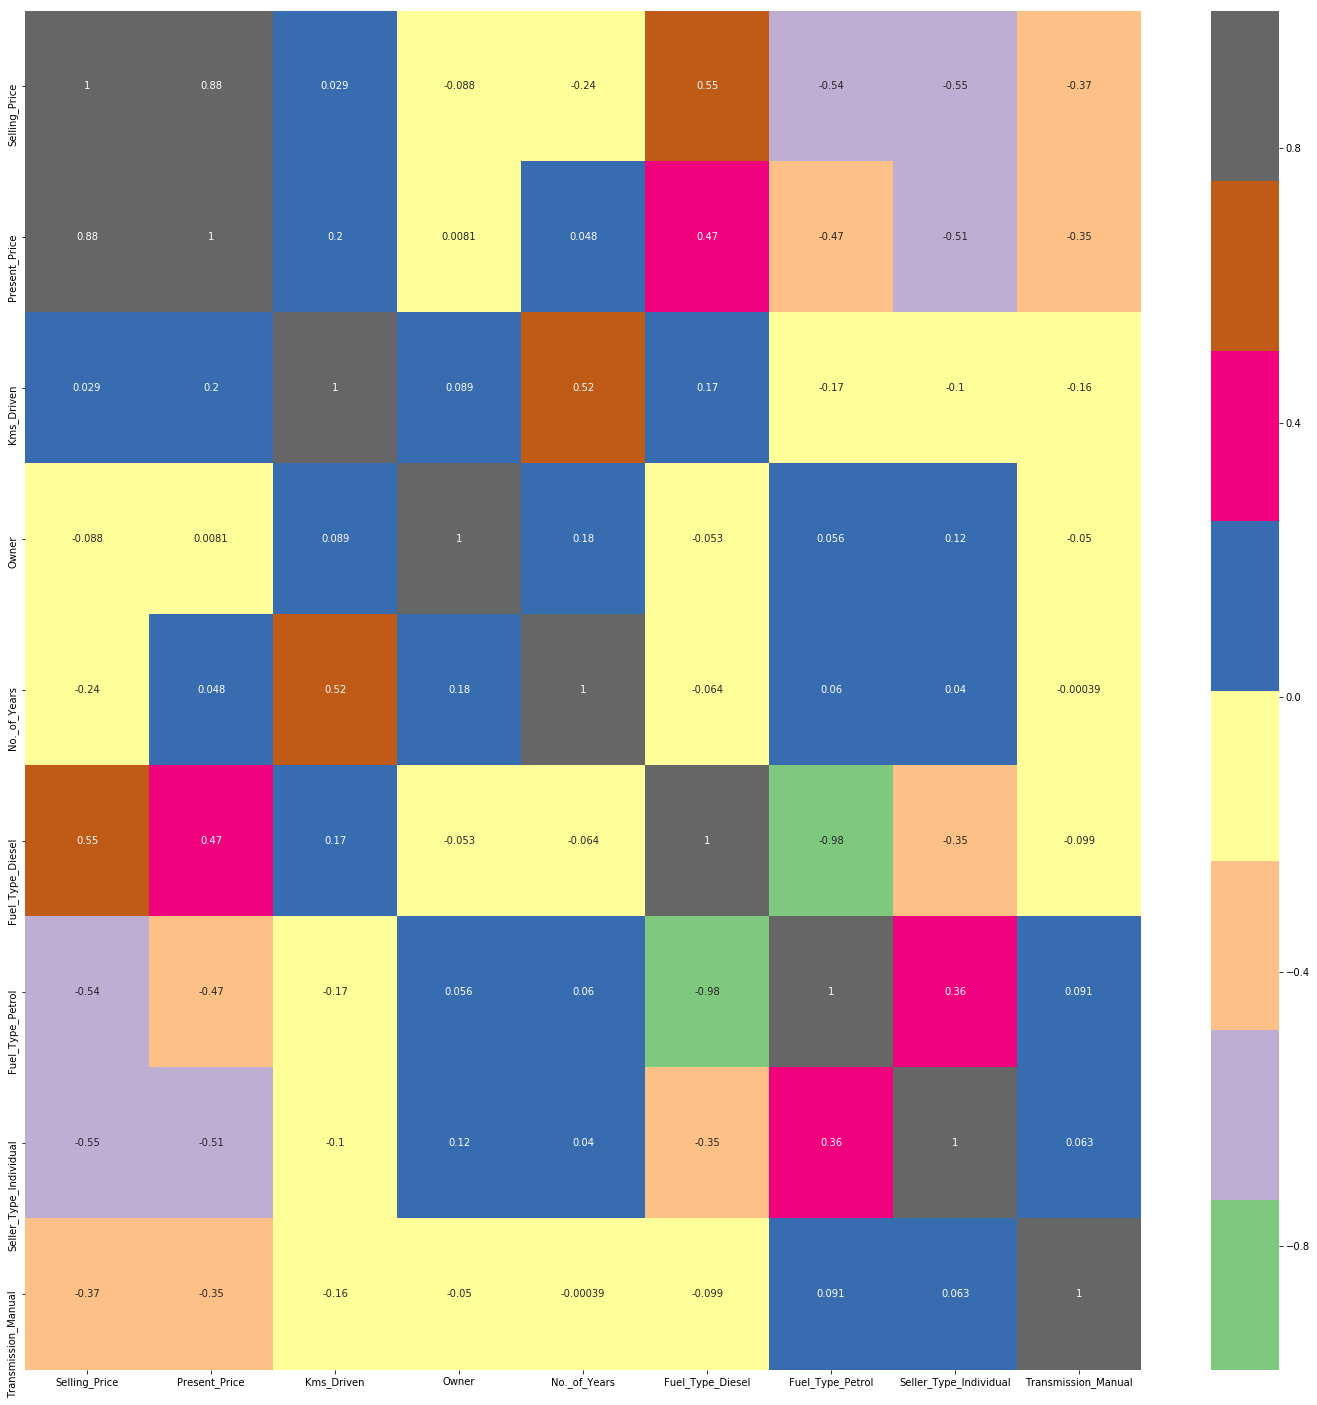

In [16]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (25,25))
h = sns.heatmap(df1[top_corr_features].corr() , annot=True , cmap='Accent')

In [17]:
X = df1.drop(columns='Selling_Price')
y = df1['Selling_Price']

In [18]:
X.head()

Present_Price  Kms_Driven  Owner  No._of_Years  Fuel_Type_Diesel  \
0           5.59       27000      0             7                 0   
1           9.54       43000      0             8                 1   
2           9.85        6900      0             4                 0   
3           4.15        5200      0            10                 0   
4           6.87       42450      0             7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
from sklearn.ensemble import ExtraTreesRegressor , RandomForestRegressor

In [21]:
model = ExtraTreesRegressor()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit , RandomizedSearchCV

In [23]:
# X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [24]:
# X_train.shape , X_test.shape , y_train.shape , y_test.shape

In [25]:
shuffle = StratifiedShuffleSplit(random_state=51 , test_size=0.2 , n_splits=1)

for train_index , test_index in shuffle.split(df1 , df1['Fuel_Type_Diesel'] , df1['Fuel_Type_Petrol']):
    X_train_shuffle = df1.iloc[train_index]
    X_test_shuffle =  df1.iloc[test_index]

In [26]:
X_train_shuffle.shape ,  X_test_shuffle.shape

((240, 9), (61, 9))

In [27]:
X_train = X_train_shuffle.drop(columns = 'Selling_Price')
y_train = X_train_shuffle['Selling_Price']
X_test = X_test_shuffle.drop(columns = 'Selling_Price')
y_test = X_test_shuffle['Selling_Price']
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [28]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [29]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
rfr = RandomForestRegressor()

In [31]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rfr = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=51, n_jobs = 1)

In [32]:
rfr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=600, min_samples_split=2, m

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=500, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=51, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [33]:
pred = rfr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


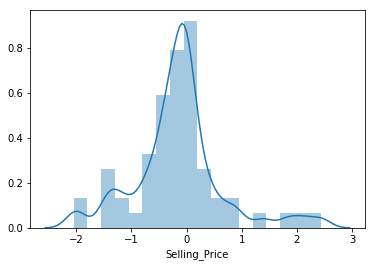

In [34]:
sns.distplot(y_test-pred)

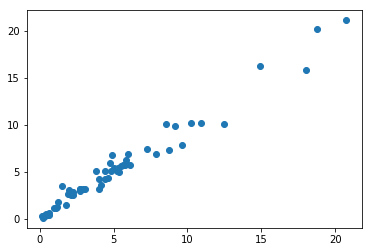

In [39]:
plt.scatter(y_test,pred)
# plt.scatter(y_test , pred , color='red')
# plt.plot(y_test , pred , color='green')

In [36]:
print(pred)  
print(list(y_test))

[10.05572016  0.46512112  0.694008    0.39642847 16.21466667  3.00490893
  3.16382004  5.77350248  4.21695313  6.9602375   5.33490215  5.69070454
  0.36515546  6.85295288  3.15526448  7.82023681 10.22994897  1.44041408
  5.13865165  5.15394701  1.27179332 21.10338889  4.26698234  7.39898805
  6.24800655  3.54804091  3.17989444  1.14450818  2.53682056  5.1535073
  5.71353697  1.83164012 20.16611667  2.57347333  4.34759807  5.04253817
 10.05605612  0.46506671  5.39070083 15.88113333  7.35947889  0.49191006
  6.93784001  5.38443117  3.24107553  0.46072035  5.88417192  5.32382006
  5.68561978  0.13326163  3.07397282  1.13812898  2.63914742  3.62300787
  2.88135972  5.14215184  9.91641008  5.91843347 10.19945675  0.31671915
  3.17798115]
[12.5, 0.5, 0.65, 0.35, 14.9, 2.7, 4.0, 5.65, 4.0, 7.9, 5.25, 6.1, 0.18, 4.9, 3.1, 9.65, 10.9, 1.75, 4.8, 5.25, 1.2, 20.75, 4.4, 7.25, 5.85, 1.5, 2.75, 1.11, 2.25, 3.8, 5.75, 1.25, 18.75, 2.1, 4.6, 5.4, 8.55, 0.6, 5.3, 18.0, 8.75, 0.45, 6.0, 5.0, 2.9, 0.48,

In [51]:
import pickle

In [ ]:
file = open('car_price_prediction_model.pkl','wb')
pickle.dump(rfr,file)